In [1]:
!pip install tensorflow
!pip install lxml

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/276.5 MB 2.2 MB/s eta 0:02:07
   ---------------------------------------- 0.2/276.5 MB 2.4 MB/s eta 0:01:55
   ---------------------------------------- 0.4/276.5 MB 2.7 MB/s eta 0:01:43
   ---------------------------------------- 0.6/276.5 MB 3.4 MB/s eta 0:01:22
   ---------------------------------------- 1.1/276.5 MB 4.3 MB/s eta 0:01:04
   ---------------------------------------- 1.8/276.5 MB 6.0 MB/s eta 0:00:47
   ---------------------------------------- 2.2/276.5 MB 6.4 MB/s eta 0:00:43
   ---------------------------------------- 2.6/276.5 MB 6.7 MB/s eta 0:00:41
   ---------------------------------------- 3.1/276.5 MB 7.0 MB/s eta 0:00:39
    -------------

In [102]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

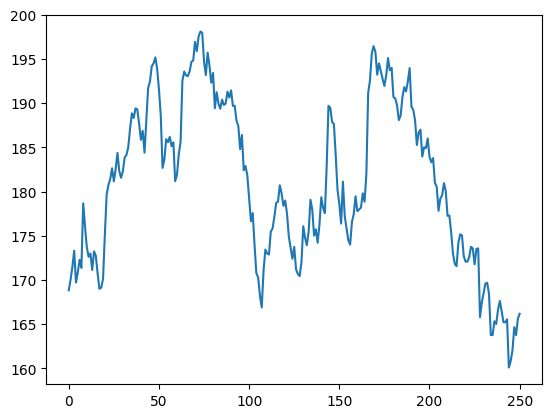

In [103]:
data = pd.read_csv(r'C:\Users\anast\Downloads\AAPL.csv')[::-1]
close_price = data.iloc[:, 4].tolist()  # Предположим, что 'Adj Close' является пятой колонкой
plt.plot(close_price)
plt.show()

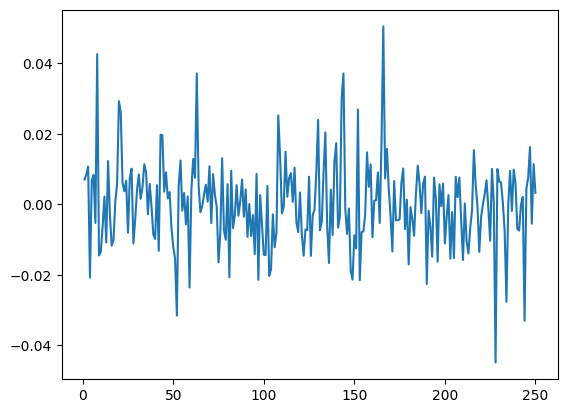

In [104]:
df = pd.DataFrame(close_price)
close_price_diffs = df.pct_change()
plt.plot(close_price_diffs)

In [105]:
model = Sequential()
model = Sequential([
    Input(shape=(32,)),
    Dense(units=64)
])
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))

In [106]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
import pandas as pd

slov = {
    'EUR': 'R01239',
    'USD': 'R01239',
    'JPY': 'R01820',
    'GBP': 'R01035',
    'CHF': 'R01775'
}

def get_price(name):
    url = f"https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2000&date_req2=02/04/2024&VAL_NM_RQ={slov[name]}"
    df = pd.read_xml(url)
    return df

df = get_price('CHF')
df.to_csv('exchange_rates.csv', index=False)
df

,Date,Id,Nominal,Value,VunitRate
0,01.01.2000,R01775,1,"16,9400","16,94"
1,06.01.2000,R01775,1,"17,4200","17,42"
2,07.01.2000,R01775,1,"17,6000","17,6"
3,11.01.2000,R01775,1,"17,7100","17,71"
4,12.01.2000,R01775,1,"18,1800","18,18"
...,...,...,...,...,...
6007,27.03.2024,R01775,1,"102,7464","102,7464"
6008,28.03.2024,R01775,1,"102,2776","102,2776"
6009,29.03.2024,R01775,1,"101,8128","101,8128"
6010,30.03.2024,R01775,1,"101,9267","101,9267"


In [142]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)
df['year'] = df['Date'].apply(lambda x: x.year)
df

KeyError: 'Date'

In [148]:
str_value_rows = df[df['Value'].apply(lambda x: isinstance(x, str))].index
df['VunitRate'] = df['VunitRate'].str.replace(',', '.').astype(float)
df = df.drop(str_value_rows)


X = df.drop(columns=['Value'])
y = df['Value']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [164]:
X_train

,Nominal,VunitRate,day,month,year
333,1,"16,79",4,5,2001
3711,1,"51,0316",29,11,2014
3023,1,"32,6309",23,2,2012
5857,1,"110,1418",17,8,2023
4219,1,"60,2566",20,12,2016
...,...,...,...,...,...
3772,1,"63,9827",6,3,2015
5191,1,"83,9608",3,12,2020
5226,1,"85,669",29,1,2021
5390,1,"78,9093",23,9,2021


In [162]:
history = model.fit(X_train, Y_train, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [136]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel(‘acc’)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

SyntaxError: invalid character '‘' (U+2018) (1187318970.py, line 14)